#### Performing Convolution using Scipy

In [1]:
from scipy.signal import convolve2d
import numpy as np

In [6]:

A = np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])
B = np.array([[0,1],[1,0]])

x = convolve2d(A, B, mode='valid')
x


array([[0, 1, 0],
       [1, 0, 1],
       [0, 1, 0]])

#### Convolution without overlapping

In [7]:
output = np.zeros((2,2))

for i in range(0, 4,2):
    for j in range(0, 4,2):
        region = A[i:i+2, j:j+2]
        output[i//2, j//2] = np.sum(region * B)

output

array([[0., 0.],
       [0., 0.]])

In [10]:
def conv_without_overlap(x, y, stride):
    kernel_size = y.shape[0]
    out_rows = x.shape[0]//stride
    out_cols = x.shape[1]//stride
    o = np.zeros((out_rows, out_cols))

    for a in range(0, x.shape[0] - kernel_size + 1, stride):
        for b in range(0, x.shape[1] - kernel_size + 1, stride):
            r = x[a:a+kernel_size, b:b+kernel_size]
            o[a//stride, b//stride] = np.sum(r * y)
    return o

In [9]:
A = np.array([[1,0,0,0,0,0],
              [0,1,0,0,0,0],
              [0,0,1,0,0,0],
              [0,0,0,1,0,0],
              [0,0,0,0,1,0],
              [0,0,0,0,0,1]])
B = np.array([[0,0,1],
              [0,1,0],
              [1,0,0]])

print(conv_without_overlap(A, B, 3))

[[1. 0.]
 [0. 1.]]


#### Trying the functions on an Image

In [9]:
import cv2

img = cv2.imread('3b8648d6-1e5d-4da6-97d3-0f8b519f59d9_ebcb8037-d98b-49e7-926f-74bbe573d577_wp1852558-koenigsegg-agera-r-wallpapers.jpg_2k.jpeg_2k.jpeg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rgb.shape


(3240, 5760, 3)

In [11]:
red = rgb[:,:,0]
green = rgb[:,:,1]
blue = rgb[:,:,2]

gray = 0.299*red + 0.587*green + 0.114*blue


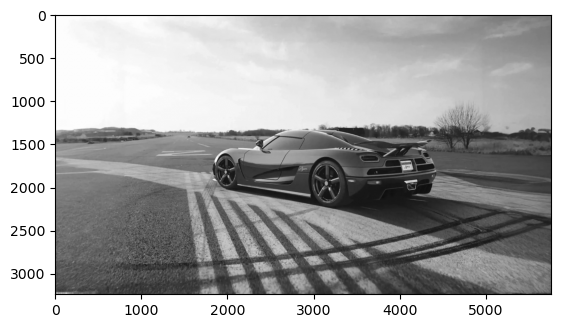

In [23]:
import matplotlib.pyplot as plt
import numpy as np
gray = np.uint8(gray)

plt.imshow(gray, cmap='gray')
plt.show()

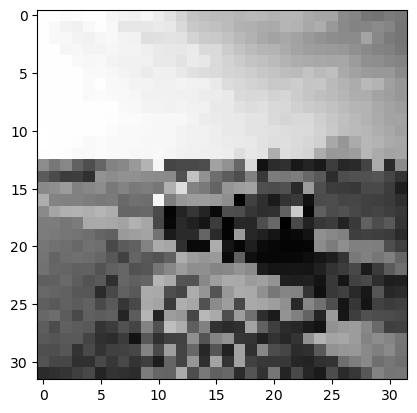

In [32]:
resized_gray_image = cv2.resize(gray, (32,32))
plt.imshow(resized_gray_image, cmap='gray')
plt.show()

In [34]:
normalized_gray_image = resized_gray_image / 255.0
print(normalized_gray_image.min(), normalized_gray_image.max())

0.06666666666666667 0.996078431372549
